In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [224]:
ab_test = pd.read_csv('/Users/veronikabelikova/Desktop/_ab_test_data.csv')

In [225]:
ab_test.head(15)

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0
5,0c6aad3a-8068-473c-98ea-88abbcacbe67,2023-07-15 21:13:55.067827,b,0
6,397c76e4-a4db-4712-b3ce-febfb13cb634,2023-07-18 07:03:05.315509,b,0
7,9b1f084d-8a7f-4526-b859-4935ca99482c,2023-07-17 12:11:21.902593,a,0
8,37ade847-cd45-4ca7-99c6-13fe881e7f42,2023-07-24 23:35:24.243933,b,0
9,b856113a-75d4-4911-894c-4d4c75f37c34,2023-07-22 19:38:24.460128,a,0


In [226]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [227]:
ab_test['timestamp'] = pd.to_datetime(ab_test['timestamp'])

In [228]:
ab_test.dtypes

user_id               object
timestamp     datetime64[ns]
test_group            object
conversion             int64
dtype: object

In [229]:
ab_test.isnull().sum()

user_id       0
timestamp     0
test_group    0
conversion    0
dtype: int64

In [230]:
ab_test.groupby('test_group')['user_id'].nunique()

test_group
a    10013
b     9985
Name: user_id, dtype: int64

In [231]:
counts_value = ab_test['test_group'].value_counts()
percent_by_groups = ((counts_value / counts_value.sum())*100).round(1)

df_group = pd.DataFrame({
    'group':counts_value.index,
    'count':counts_value.values,
    'percent': percent_by_groups.values
})
df_group

,group,count,percent
0,a,10013,50.1
1,b,9985,49.9


Text(0.5, 1.0, 'Users per group')

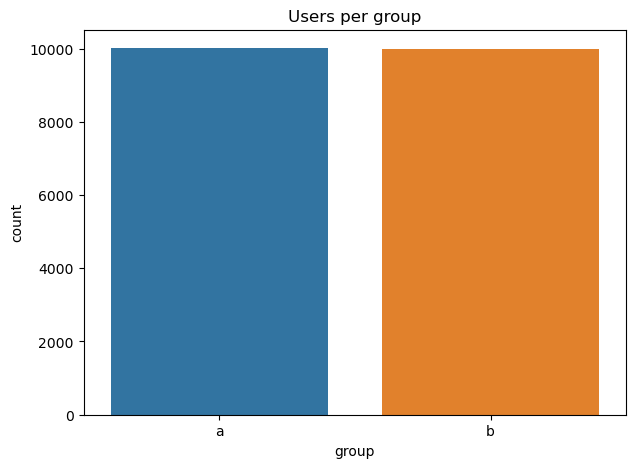

In [232]:
plt.figure(figsize=(7,5))

sns.barplot(data=df_group, x='group', y='count', hue='group')
plt.xlabel('group')
plt.ylabel('count')
plt.title('Users per group')

In [233]:
conversation_count = ab_test.groupby('test_group')['conversion'].sum()

convers_rate = (ab_test.groupby('test_group')['conversion'].mean() * 100).round(1)

df_conversation_count = pd.DataFrame({
    'group':counts_value.index,
    'count':counts_value.values,
    'convers_count':conversation_count.values,
    'convers_rate': convers_rate.values,
})

df_conversation_count

,group,count,convers_count,convers_rate
0,a,10013,611,6.1
1,b,9985,889,8.9


Text(0.5, 1.0, 'Сonversation per group')

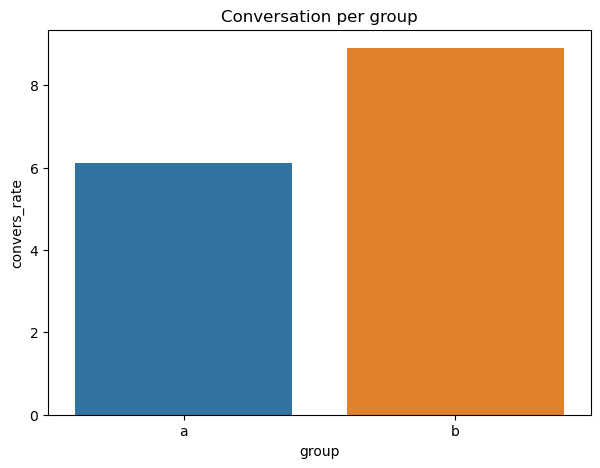

In [234]:
plt.figure(figsize=(7,5))

sns.barplot(data=df_conversation_count, x='group', y='convers_rate', hue='group')
plt.xlabel('group')
plt.ylabel('convers_rate')
plt.title('Сonversation per group')

In [235]:
diff_convers = (convers_rate['b'] - convers_rate['a']).round(2)
print(f'Difference conversation between groups b and a: {diff_convers}%')

Difference conversation between groups b and a: 2.8%


In [236]:
start_day = ab_test['timestamp'].min().date()
finished_day = ab_test['timestamp'].max().date()
duration_ab = (finished_day - start_day).days + 1

print(f'Start of the test: {start_day}\nTest finished: {finished_day}\nThe test lasted: {duration_ab} days')

Start of the test: 2023-07-03
Test finished: 2023-07-25
The test lasted: 23 days


In [237]:
ab_test['date'] = ab_test['timestamp'].dt.date

daily_conv = (
      ab_test.groupby(['date', 'test_group'])['conversion']
        .mean()
        .reset_index()
)
daily_conv.head()

,date,test_group,conversion
0,2023-07-03,a,0.050971
1,2023-07-03,b,0.087640
2,2023-07-04,a,0.065022
3,2023-07-04,b,0.081858
4,2023-07-05,a,0.064220


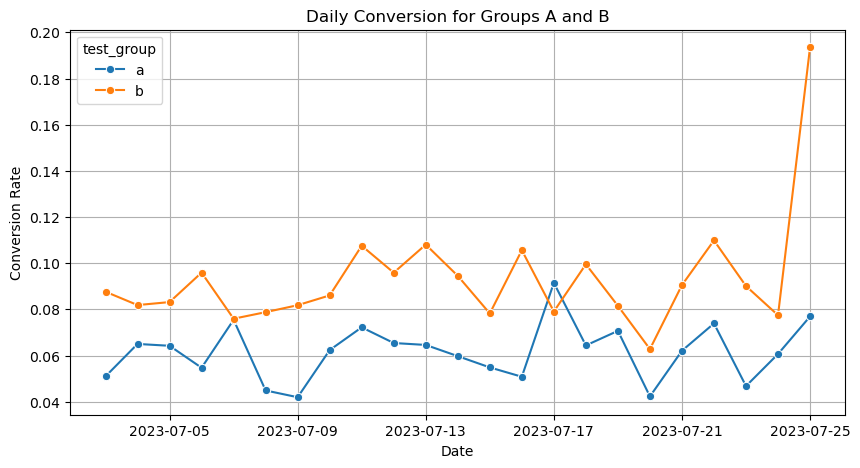

In [238]:
plt.figure(figsize=(10,5))

sns.lineplot(data = daily_conv, x = 'date', y = 'conversion', hue = 'test_group', marker='o')

plt.title('Daily Conversion for Groups A and B')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


In [239]:
observed = pd.crosstab(ab_test['test_group'], ab_test['conversion'])
print(observed)

conversion     0    1
test_group           
a           9402  611
b           9096  889


In [240]:
statistic, pvalue, dof, expected_values = stats.chi2_contingency(observed)
print(f"Сhi2-statistic: {round(statistic,2)}, p-value: {pvalue}")

Сhi2-statistic: 56.14, p-value: 6.740440730497393e-14


In [241]:
alpha = 0.05
if pvalue < alpha:
    print("The difference is statistically significant, null hypothesis is rejected.")
else:
    print("The difference is not statistically significant, null hypothesis cannot be rejected.")

The difference is statistically significant, null hypothesis is rejected.


In [242]:
def statistic(a,b):
    return stats.ttest_ind(a,b).statistic

alpha = 0.05

a = ab_test[ab_test['test_group'] == 'a']['conversion']
b = ab_test[ab_test['test_group'] == 'b']['conversion']

result = stats.permutation_test((a, b), statistic, n_resamples=200000)

print(f"T-statistic:{round(result.statistic, 2)}, p-value:{result.pvalue}")

if pvalue < alpha:
    print("The difference is statistically significant, null hypothesis is rejected.")
else:
    print("The difference is not statistically significant, null hypothesis cannot be rejected.")

T-statistic:-7.53, p-value:9.999950000249999e-06
The difference is statistically significant, null hypothesis is rejected.


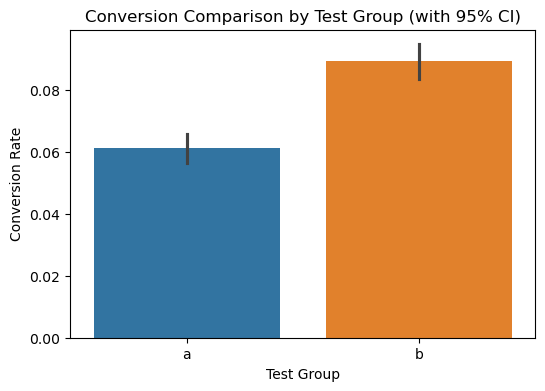

In [243]:
plt.figure(figsize=(6,4))
sns.barplot(
    data= ab_test, 
    x='test_group', 
    y='conversion', 
    hue = 'test_group',
    errorbar=('ci', 95)  
)

plt.title('Conversion Comparison by Test Group (with 95% CI)')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.show()
